<a href="https://colab.research.google.com/github/triductran00/FashionMNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /

/


In [ ]:
cd /content/drive/MyDrive/Fashion_MNIST

/content/drive/MyDrive/Fashion_MNIST


In [ ]:
pip install --upgrade keras

In [ ]:
# from keras.models import Sequential, load_model
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers.convolutional import Conv2D, MaxPooling2D
# from keras.optimizers import SGD
# from keras.utils import np_utils
# from keras.datasets import fashion_mnist
# import matplotlib.pyplot as plt
# import numpy as np
# # from mnist import load_mnist

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


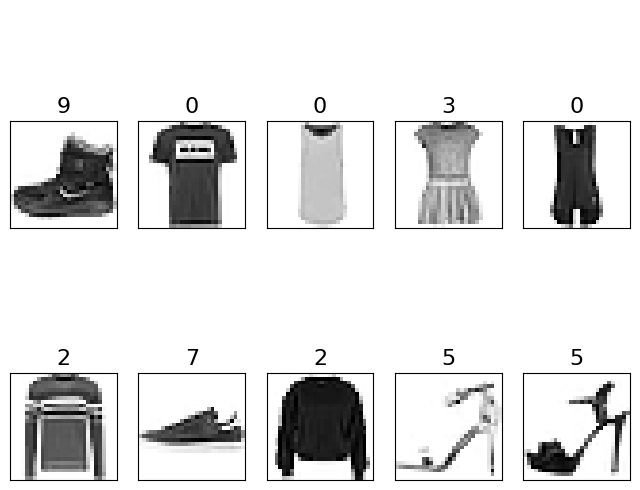

In [ ]:
# 0:Load MNIST data
# (x_train, t_train), (x_test, t_test) = load_mnist(normalize=False, one_hot_label=False)
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
n_data = 10
row = 2
col = 5
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(8, 6))

fig.suptitle("MNIST data-set", fontsize=24, color='white')
for i, img in enumerate(x_train[:n_data]):
    _r = i // col
    _c = i % col
    ax[_r,_c].set_title(t_train[i], fontsize=16, color='black')
    ax[_r,_c].axes.xaxis.set_visible(False)
    ax[_r,_c].axes.yaxis.set_visible(False)
    ax[_r,_c].imshow(img.reshape(28, 28), cmap='Greys')

plt.show()
plt.close()

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
from tensorflow.keras.utils import to_categorical

# Assuming t_train and t_test are your labels
t_train = to_categorical(t_train)
t_test = to_categorical(t_test)

num_classes = t_test.shape[1]  # Assuming t_test has the same shape as t_train


In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(28,28,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                  │ (None, 28, 28, 32)            │         320 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_2 (MaxPooling2D)     │ (None, 14, 14, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_3 (Conv2D)                  │ (None, 14, 14, 64)            │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_3 (MaxPooling2D)     │ (None, 7, 7, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_1 (Flatten)                │ (None, 3136)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_2 (Dense)                    │ (None, 256)                   │     803,072 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_2 (Dropout)                │ (None, 256)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_3 (Dense)                    │ (None, 512)                   │     131,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_3 (Dropout)                │ (None, 512)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_4 (Dense)                    │ (None, 10)                    │       5,130 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 958,602 (3.66 MB)

 Trainable params: 958,602 (3.66 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(learning_rate=0.01, momentum=0.9),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, t_train, validation_data = (x_test, t_test), epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.6783 - loss: 0.8561 - val_accuracy: 0.8680 - val_loss: 0.3620
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8681 - loss: 0.3640 - val_accuracy: 0.8908 - val_loss: 0.2953
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8890 - loss: 0.2976 - val_accuracy: 0.8998 - val_loss: 0.2740
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9041 - loss: 0.2599 - val_accuracy: 0.9024 - val_loss: 0.2705
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9132 - loss: 0.2387 - val_accuracy: 0.9075 - val_loss: 0.2518
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9164 - loss: 0.2216 - val_accuracy: 0.9128 - val_loss: 0.2494
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9264 - loss: 0.2014 - val_accuracy: 0.9150 - val_loss: 0.2420
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9317 - loss: 0.1830

In [ ]:
loss, accuracy = model.evaluate(x_test, t_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9233 - loss: 0.2394


In [ ]:
model.save('/drive/MyDrive/Fashion_MNIST/my_model.h5')

In [ ]:
model = load_model('/drive/MyDrive/Fashion_MNIST/my_model.h5')
model.evaluate(x_test, t_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9233 - loss: 0.2394


[0.22984617948532104, 0.9214000105857849]

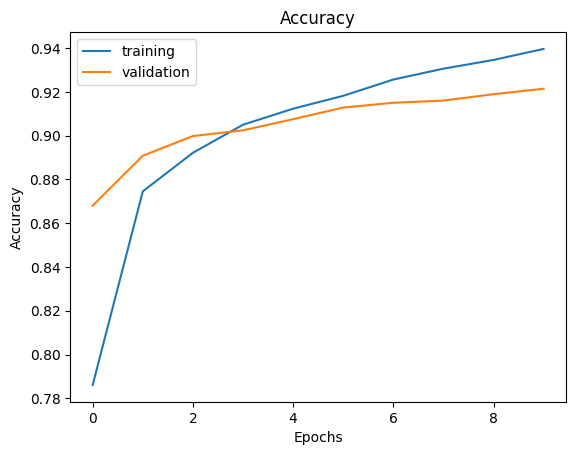

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

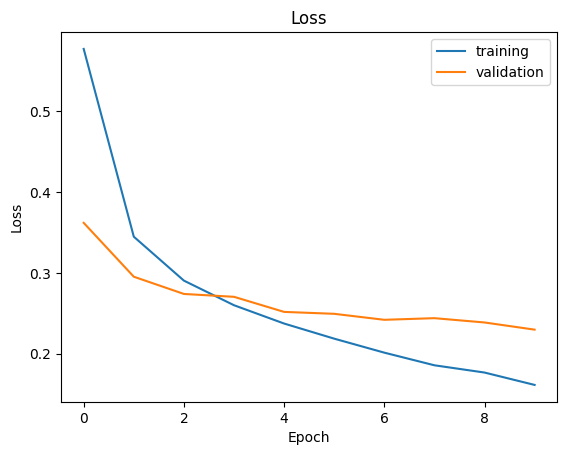

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


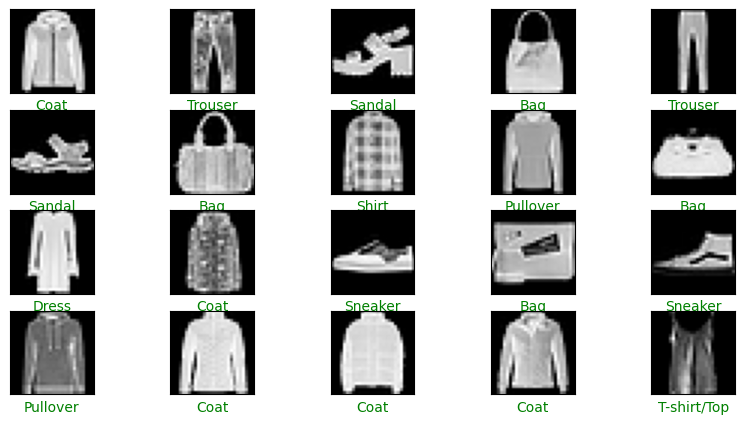

In [ ]:
pred = model.predict(x_test)
pred_class = np.argmax(pred,axis=1)
true_test_label = np.argmax(t_test,axis=1)

class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,5))

choice = np.random.choice(range(x_test.shape[0]), 20)

for i, index in enumerate(choice):
  plt.subplot(4, 5, i+1)
  plt.imshow(x_test[index].reshape(28,28), cmap = 'gist_gray')
  plt.xticks([])
  plt.yticks([])

  if pred_class[index] == true_test_label[index]:
    col = 'g'
    plt.xlabel(class_names[pred_class[index]], color = col)
  else:
    col = 'r'
    plt.xlabel(
        f" { class_names[true_test_label[index]] }  not { class_names[pred_class[index]] } "
        , color = col)

In [ ]:
from sklearn.metrics import confusion_matrix

# class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

conf_mat = confusion_matrix(true_test_label, pred_class)
print(conf_mat)

[[861   0  22  15   5   1  92   0   4   0]
 [  1 985   0  10   1   0   1   0   2   0]
 [ 18   1 859   7  73   0  42   0   0   0]
 [ 14   3  11 912  41   0  18   0   1   0]
 [  0   1  23  10 934   0  32   0   0   0]
 [  1   0   0   0   0 983   0  14   0   2]
 [ 89   1  53  25  83   0 745   0   4   0]
 [  0   0   0   0   0   3   0 986   0  11]
 [  4   2   1   2   3   1   1   1 985   0]
 [  1   0   0   0   0   6   0  29   0 964]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


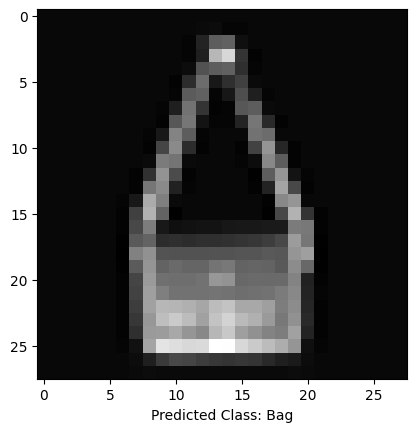

In [ ]:
from keras.models import load_model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

model = load_model('/drive/MyDrive/Fashion_MNIST/my_model.h5')

def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    img_array = img_array.astype('float32')
    img_array = img_array / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    return img_array

image_path = '/content/mini_square_bag-be_1_7a246728d200490d8f0454ac7e40349d_master.webp'
input_image = preprocess_image(image_path)
prediction = model.predict(input_image)
pred_class = np.argmax(prediction, axis=1)

class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(input_image[0].reshape(28, 28), cmap='Greys')
plt.xlabel(f"Predicted Class: {class_names[pred_class[0]]}")
plt.show()